In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from peak_detection import detect_spikes, get_waveforms

In [103]:
Fs = 30000     # sampling rate of the signal in Hz
dt = 1/Fs
gain = .5  
PRIMARY_COLOUR = "black"

In [104]:
df = pd.read_csv("./tubingen_exersizes/data/filtered_signal.csv")

df.head()

,Unnamed: 0,Ch1,Ch2,Ch3,Ch4
0,0,-3.324364e-10,-4.226478e-10,7.466865e-10,-1.857514e-09
1,1,-1.656188e+00,1.618690e+00,5.753624e+00,-4.373628e+00
2,2,-6.687551e+00,2.324345e+00,7.815885e+00,-8.476717e+00
3,3,-1.678361e+01,1.246341e+00,4.150506e+00,-1.287599e+01
4,4,-3.098116e+01,-2.249123e+00,-4.835007e+00,-1.877361e+01


In [105]:
y = df['Ch1'].values

In [116]:
# calculate robust s.d. using the mean absolute deviation
sigma = np.median(np.abs(y - np.median(y)) / 0.6745)

threshold_factor = -4

# set the threshold
threshold = threshold_factor * sigma

Text(0, 0.5, 'Voltage')

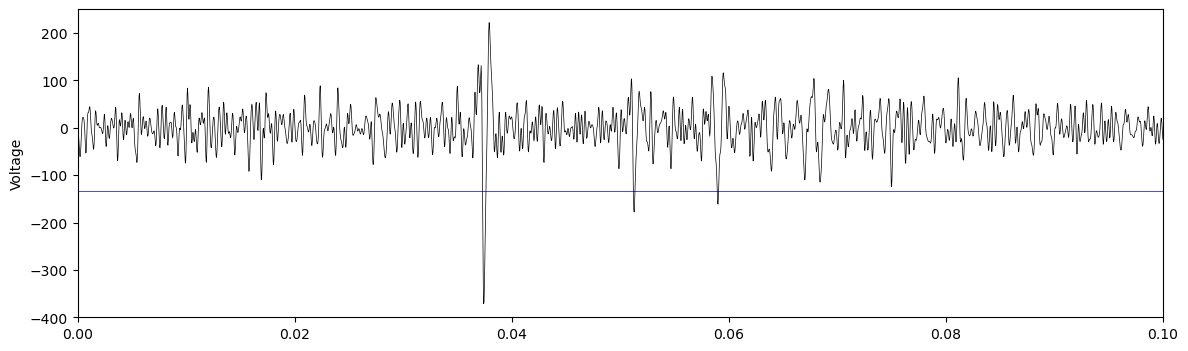

In [117]:
plt.figure(figsize=(14, 4))

T = 100000
t = np.arange(0, T) * dt 

plt.plot(t, y[0:T], linewidth=.5, c="black")
plt.ylim((-400, 250))
plt.xlim((0, 0.1))
plt.axhline(y=threshold, c="blue", linewidth=0.5, zorder=0)
plt.ylabel('Voltage')

In [118]:
print(type(y[0:T]))

<class 'numpy.ndarray'>


In [119]:
spikes = detect_spikes(y=y[0:T], threshold=threshold, minimum_gap=1, use_absolute_threshold=True, flipped=True)

In [120]:
print(len(spikes))
print(spikes)

52
[ 1123  1539  1771  5495  6801  7976 11368 15594 18533 22983 24351 25440
 26736 28704 31570 32698 35895 36817 37123 42278 45500 45610 45825 46747
 48339 48391 52003 52851 52882 57827 59726 59797 60765 62687 68032 68302
 68823 69187 72742 75873 75969 76377 76957 79762 82989 84805 84990 85386
 93237 93325 94237 98051]


Text(0, 0.5, 'Voltage')

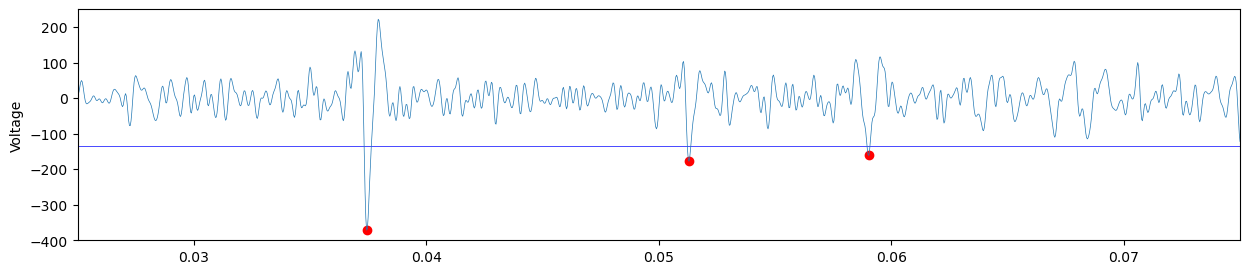

In [121]:
plt.figure(figsize=(15, 3))

t = np.arange(0, T) * dt 

# Plot the signal
plt.plot(t, y[0:T], linewidth=.5)

# Plot the threshold
plt.axhline(y=threshold, c="blue", linewidth=0.5, zorder=0)

# Plot the spike locations
plt.scatter(spikes * dt, y[spikes], color='red')

plt.ylim((-400, 250))
plt.xlim((0.025, 0.075))
plt.ylabel('Voltage')


In [122]:
waveforms, waveform_info = get_waveforms(y=y[0:T], spike_indices=spikes, duration=1, sample_rate=Fs, window_shift_ratio=1/3)

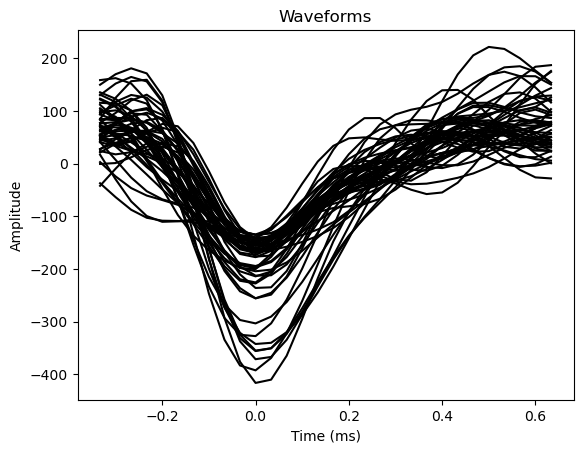

In [123]:
# iterate over the waveforms and plot each on top of each other
for i, waveform in enumerate(waveforms):
    t = np.arange(-10, 20) * dt * 1000 

    # plot the waveform
    plt.plot(t, waveform, c="black")

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Waveforms')
plt.show()

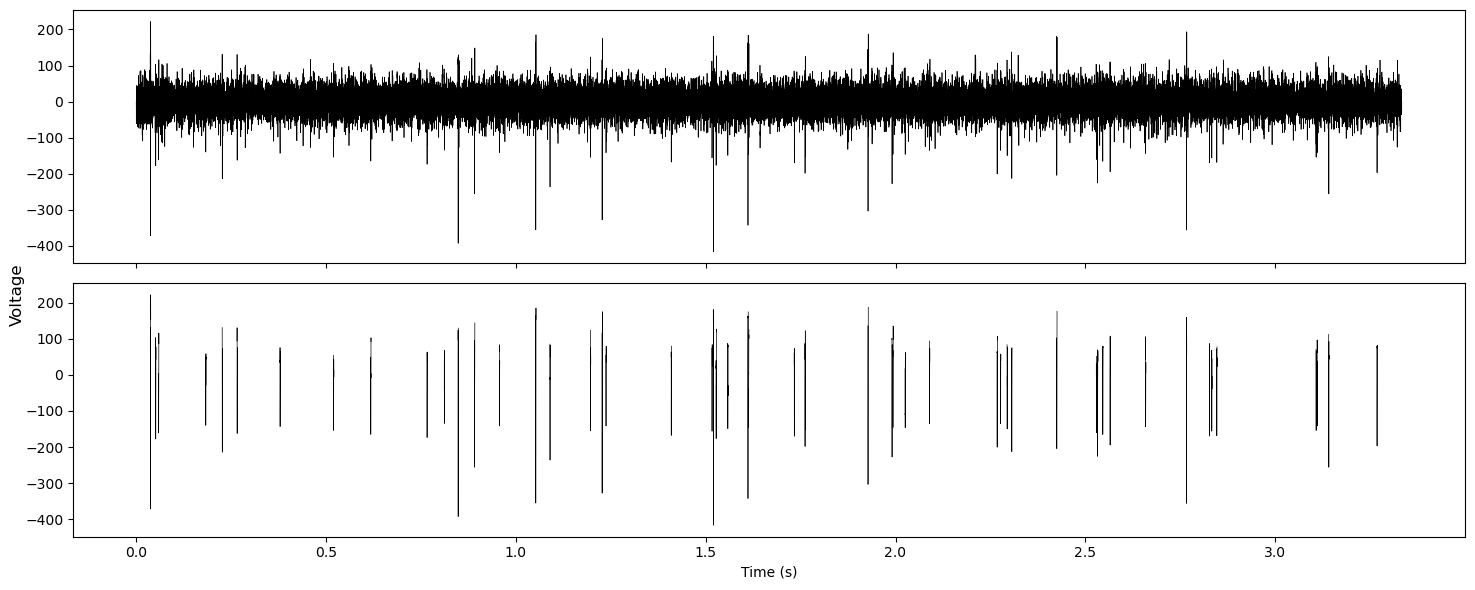

In [125]:
fig, axs = plt.subplots(2, 1, figsize=(15, 6), sharex=True)

# plot the filtered data
t = np.arange(0, T) * dt 
axs[0].plot(t,  y[0:T], label='Raw Data', c=PRIMARY_COLOUR, lw=0.5)

# iterate through each spike and plot its waveform
for spike in waveform_info:
    spike_window = slice(spike["spike_start"], spike["spike_end"])
    axs[1].plot(t[spike_window], y[0:T][spike_window], c=PRIMARY_COLOUR, lw=0.5)

axs[1].set_xlabel('Time (s)')
fig.supylabel("Voltage")

plt.tight_layout()
plt.show()